Task 5 : Exploratory Data Analysis Sports

Perform Exploratory Data Analysis on the "matches" and "deliveries" datasets 

*As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
*Suggest teams or players a company should endorse for its products.

In [2]:
#necessary libraries
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline

In [3]:
#reading the data
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#shape of the data
matches.shape

(756, 18)

In [5]:
#columns of the data
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
#info of the data
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#statistical description of the data
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
#checking for null values
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
#checking for unique values
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

primmary analysis

In [10]:
print("City in which most matches have been won: ",matches['city'].value_counts().idxmax()) 
print("Team that has won most matches: ",matches['winner'].value_counts().idxmax()) 
print("Player who has been man of the match most times: ",matches['player_of_match'].value_counts().idxmax()) 
print("Most frequent Umpire 1: " ,matches['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2: " ,matches['umpire2'].value_counts().idxmax())

City in which most matches have been won:  Mumbai
Team that has won most matches:  Mumbai Indians
Player who has been man of the match most times:  CH Gayle
Most frequent Umpire 1:  HDPK Dharmasena
Most frequent Umpire 2:  C Shamshuddin


Removing null values

In [11]:
matches['city'].fillna(value='Mumbai', inplace=True)
matches['winner'].fillna(value='Mumbai Indians', inplace=True)
matches['player_of_match'].fillna(value='CH Gayle', inplace=True)
matches['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
matches['umpire2'].fillna(value='C Shamshuddin', inplace=True)
matches['umpire3'].fillna(value='NA', inplace=True)

In [12]:
#rechecking for null values
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [13]:
#checking for duplicated values
matches.duplicated().sum()

0

Data visualization 

Top 10 teams and Top 10 players 

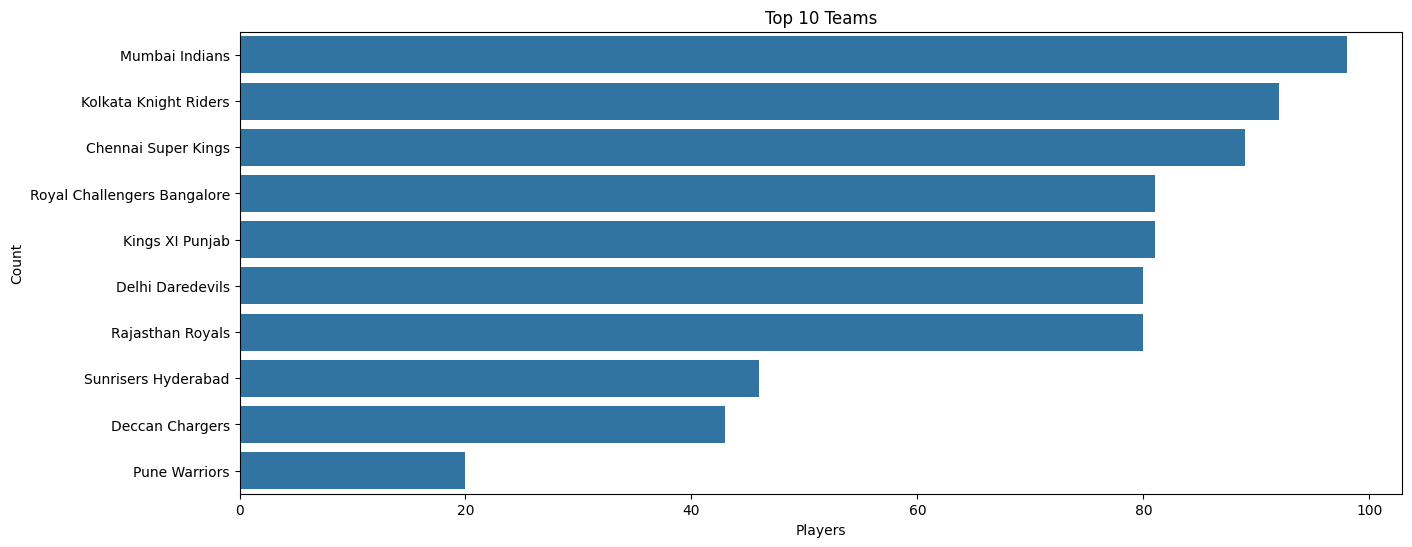

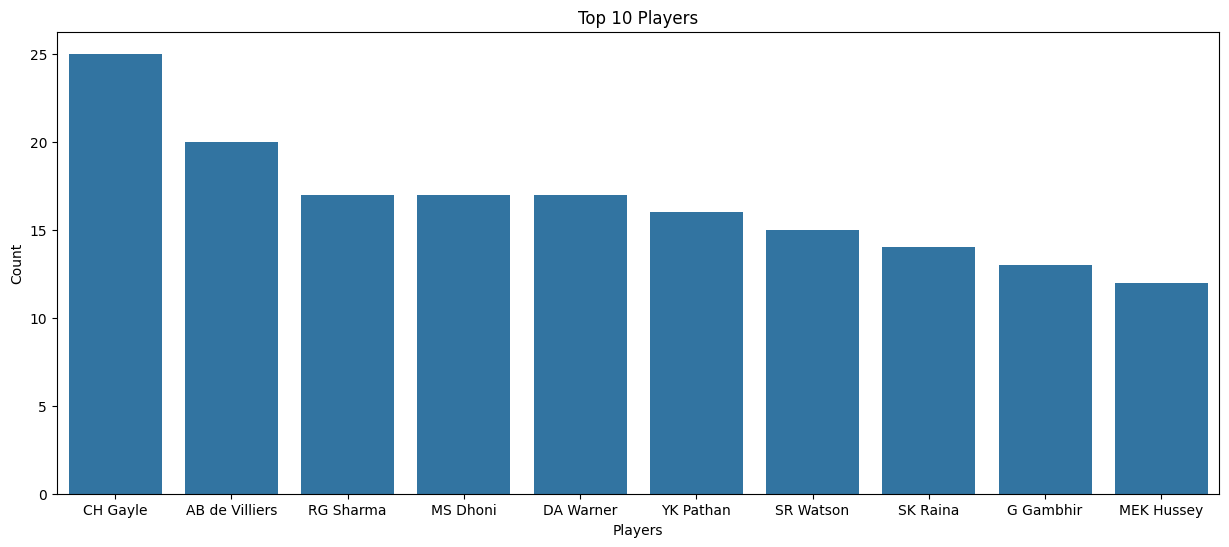

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x=matches['toss_winner'].value_counts()[:10].values, y=matches['toss_winner'].value_counts()[:10].index)
plt.title('Top 10 Teams')
plt.xlabel('Players')
plt.ylabel('Count')
plt.show()


plt.subplots(figsize=(15,6))
sns.barplot(x=matches['player_of_match'].value_counts()[:10].index, y=matches['player_of_match'].value_counts()[:10].values)
plt.title('Top 10 Players')
plt.xlabel('Players')
plt.ylabel('Count')
plt.show()

Finding the Factors Affecting the Victory

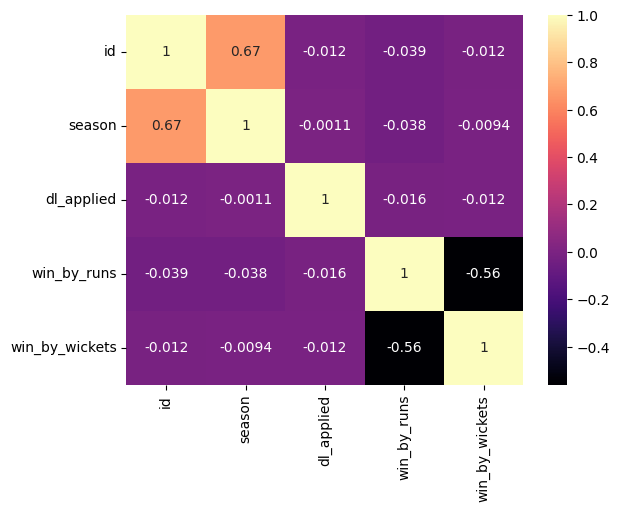

Axes(0.125,0.11;0.62x0.77)


In [15]:
numeric_columns = matches.select_dtypes(include=np.number)
correlation = sns.heatmap(numeric_columns.corr(), annot=True, cmap='magma')
plt.show()
print(correlation)

From the correlation matrix we could see that 'dl_applied', 'season' have less correlation in the data so we are going to drop them

In [16]:
matches = matches.drop(['dl_applied', 'season'], axis=1)

Teams that Won the Toss

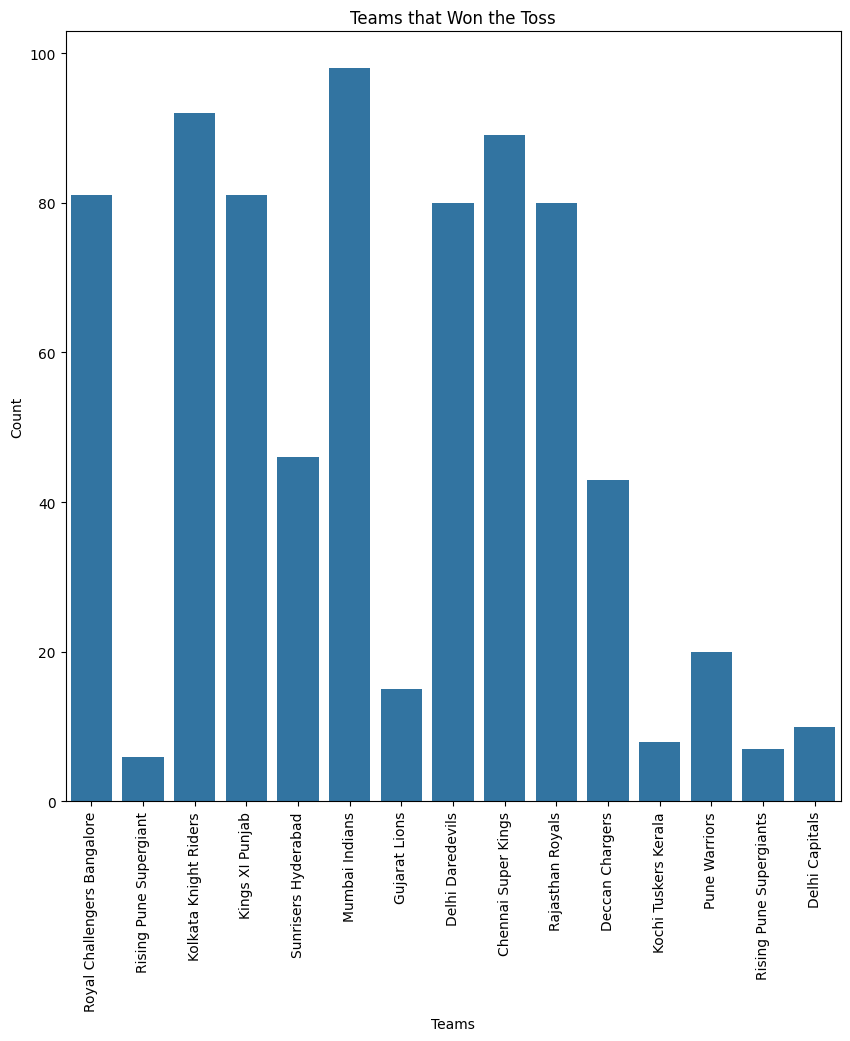

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x=matches['toss_winner'], data=matches)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Teams that Won the Toss')
plt.xticks(rotation=90)
plt.show()

In [18]:
print('Team that won most matches by Batting First: ',matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmax()]['winner'])

Team that won most matches by Batting First:  Mumbai Indians


Exploratory Data Analysis on deliveries dataset 

In [19]:
#reading the data
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
#shape of the data
deliveries.shape

(179078, 21)

In [21]:
#columns of the data
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [22]:
#info of the data
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [23]:
#statistical description of the data
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [24]:
#checking for null values
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [25]:
#dropping the unnecessary columns 
deliveries = deliveries.drop(['dismissal_kind','fielder'], axis=1)

Merging the two dataset matches and deliveries

In [26]:
delivery=pd.merge(deliveries, matches, left_on='match_id', right_on='id')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA


In [27]:
#the shape of the data
delivery.shape

(179078, 35)

In [28]:
#the size of the data
delivery.size

6267730

In [29]:
#the columns of the data
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'id',
       'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match',
       'venue', 'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [30]:
#the info of the data
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [31]:
#cheking for null values
delivery.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
id                       0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
dtype: int64

In [32]:
#removing the null values
delivery['player_dismissed'].fillna(value='NA', inplace=True)
delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
id                  0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
dtype: int64

In [33]:
#checking for duplicated values
delivery.duplicated().sum()

23

In [34]:
#dropping the duplicated values
delivery.drop_duplicates(inplace=True)

Correlation between Columns

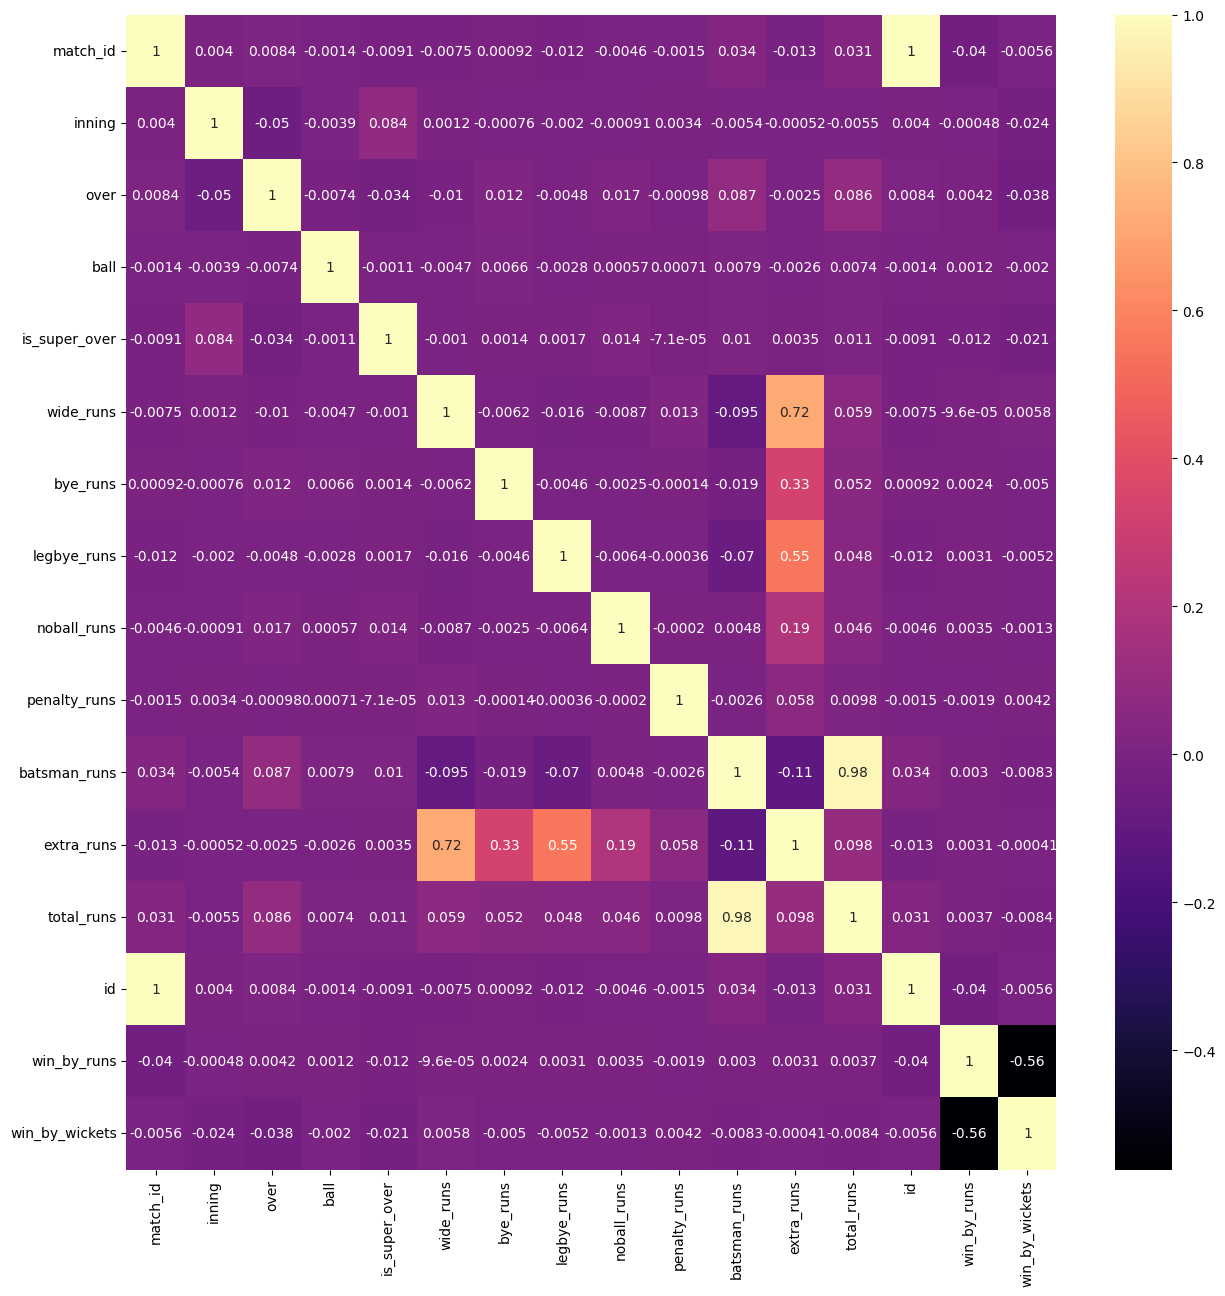

In [35]:
plt.figure(figsize=(15,15))
numeric_columns = delivery.select_dtypes(include=np.number)
correlation = sns.heatmap(numeric_columns.corr(), annot=True, cmap='magma')
plt.show()

Number of Matches Played in Each Stadium


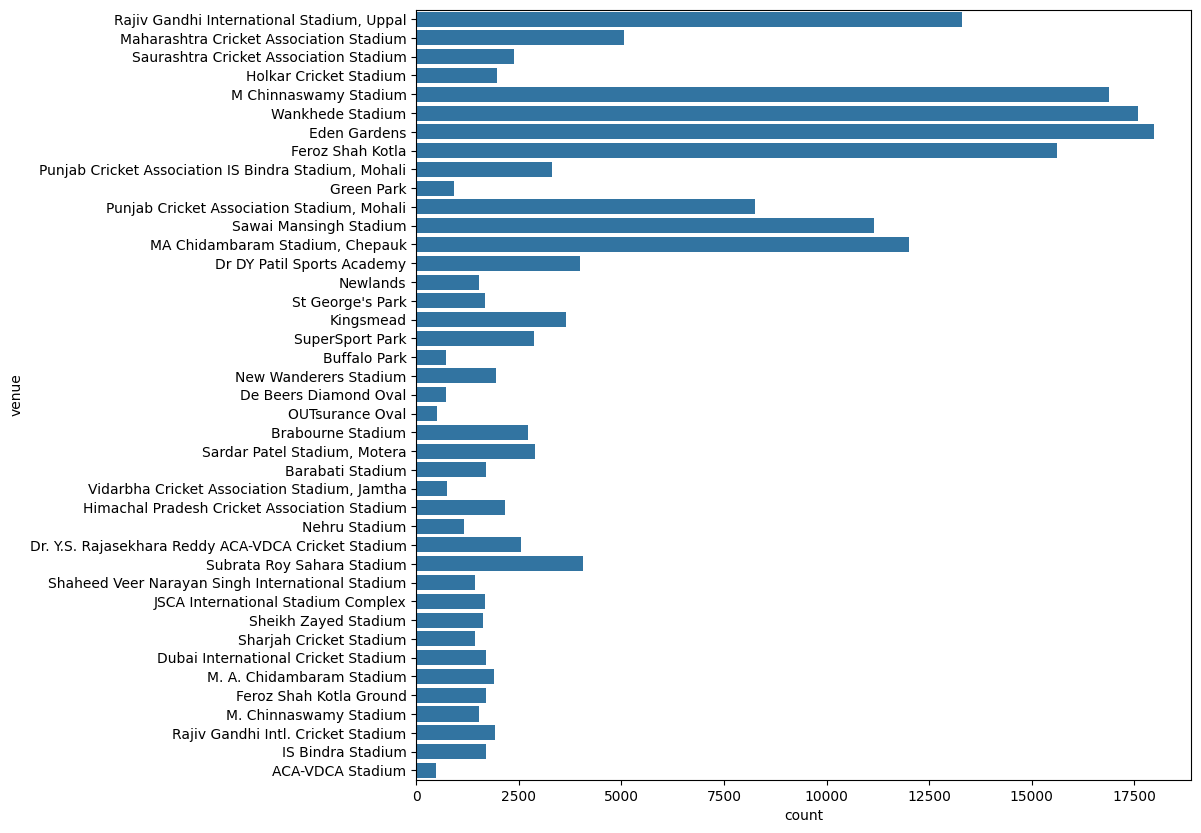

In [36]:
delivery.venue.value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=delivery, y='venue')
plt.show()

Details on Toss won by each team, Total Matches played so far, total matches being won list.

In [37]:
team_stats = pd.DataFrame({'Total Matches played': matches.team1.value_counts() + matches.team2.value_counts(), 'Total won': matches.winner.value_counts(), 'Toss won': matches.toss_winner.value_counts(), 
                          'Total lost': ((matches.team1.value_counts() + matches.team2.value_counts()) - matches.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Total won'] / team_stats['Total Matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total Matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,113,98,74,0.60
9,Pune Warriors,46,12,20,34,0.26


Maximum Toss Won:

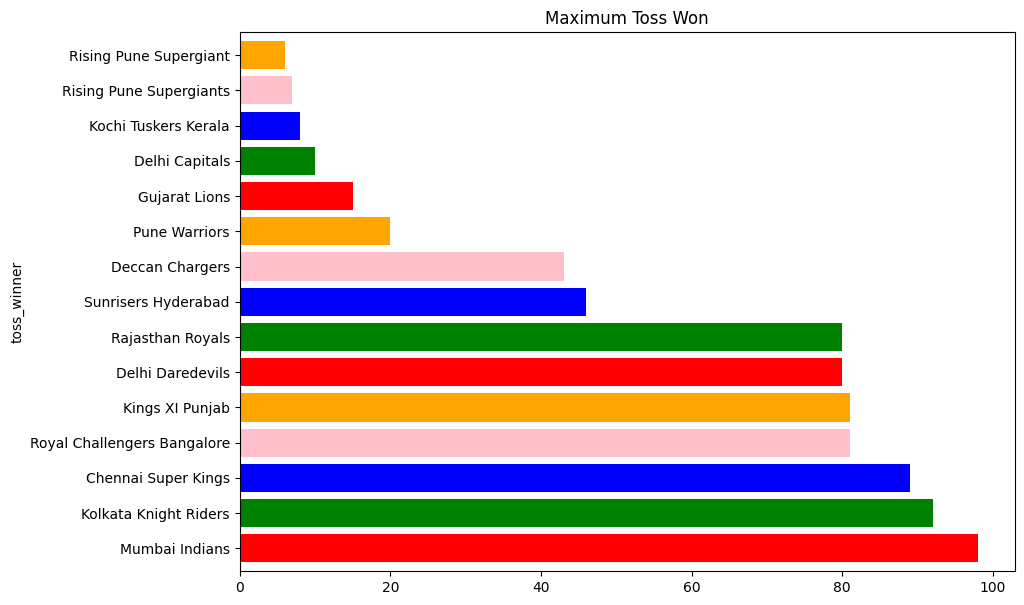

In [38]:
plt.subplots(figsize=(10,7))
ax=matches['toss_winner'].value_counts().plot.barh(width=0.8,color=['red', 'green','blue','pink','orange'])
plt.title("Maximum Toss Won")
plt.show()

Teams who had won Toss and Won the match

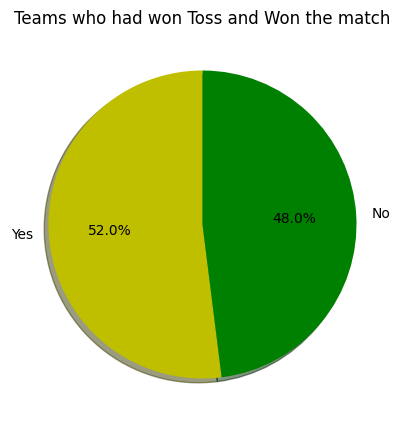

In [39]:
Tosswin_matchwin=matches[matches['toss_winner']==matches['winner']]
slices=[len(Tosswin_matchwin),(len(matches)-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['y','g'])
plt.title("Teams who had won Toss and Won the match")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

<Axes: xlabel='toss_decision'>

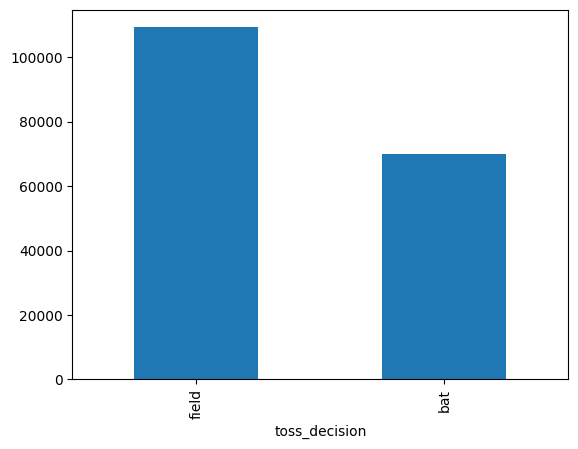

In [40]:
#Deciding Whether to Bat or Field After Winning the Toss
ts=delivery.toss_decision.value_counts().plot(kind='bar')
ts

Relation between Winning toss and victory

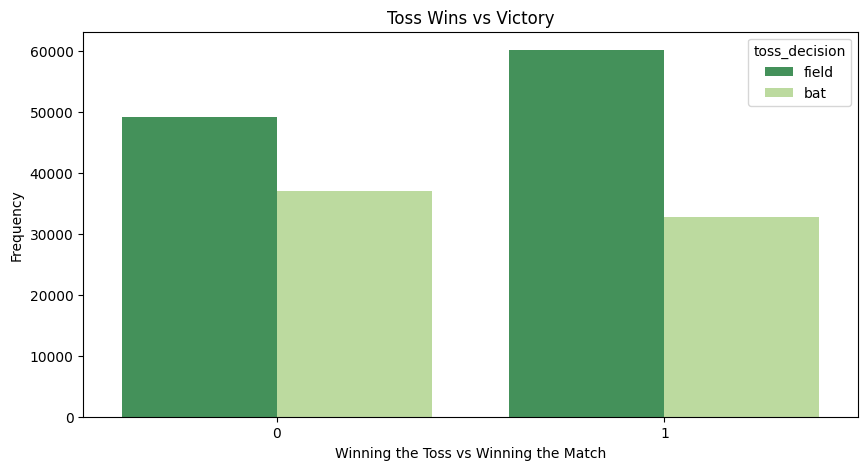

In [41]:
delivery['team_toss_win']=np.where((delivery.toss_winner==delivery.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot(x='team_toss_win', data=delivery, hue='toss_decision', palette='YlGn_r')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory")
plt.show()